In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/sample_data/Salary_Data.csv")
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
data.shape

(30, 2)

In [7]:
data.dtypes

,0
YearsExperience,float64
Salary,float64


In [8]:
data.isna().sum()

,0
YearsExperience,0
Salary,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.corr()  #correlation matrix

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


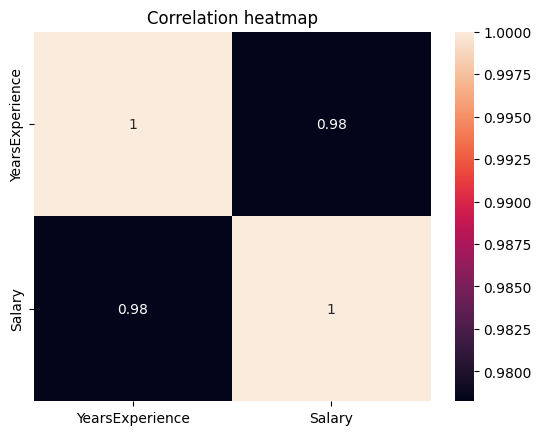

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot= True) # annot = gives correlation value in squares
plt.title("Correlation heatmap")
plt.show()

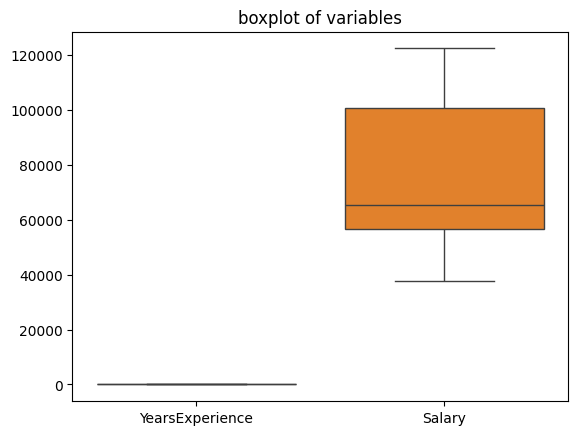

In [12]:
sns.boxplot(data=data)
plt.title("boxplot of variables")
plt.show()


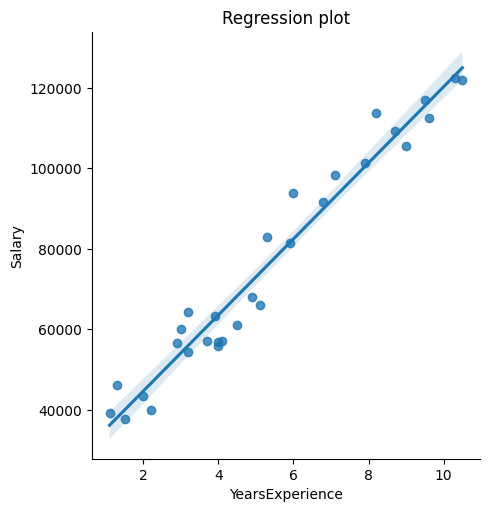

In [13]:
sns.lmplot(x="YearsExperience",y="Salary",data=data)
plt.title("Regression plot")
plt.show()

In [14]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [15]:
data.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [16]:
X=data[['YearsExperience']]
Y=data[['Salary']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
lrreg1=LinearRegression()

In [23]:
lrreg1.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred=lrreg1.predict(X_test)
Y_pred

array([[115814.30756236],
       [ 71511.92534771],
       [102617.85328566],
       [ 75282.34085534],
       [ 55487.65944028],
       [ 60200.67882482],
       [122412.53470072],
       [107330.8726702 ],
       [ 63028.49045554],
       [ 35692.97802523]])

In [25]:
lrreg1.coef_


array([[9426.03876907]])

In [26]:
lrreg1.intercept_

array([25324.33537924])

In [27]:
#y=mx+c  #how this works for different pred values and x which is number of years
#eg:115814.30756236 = 9426.03876907*x+25324.33537924

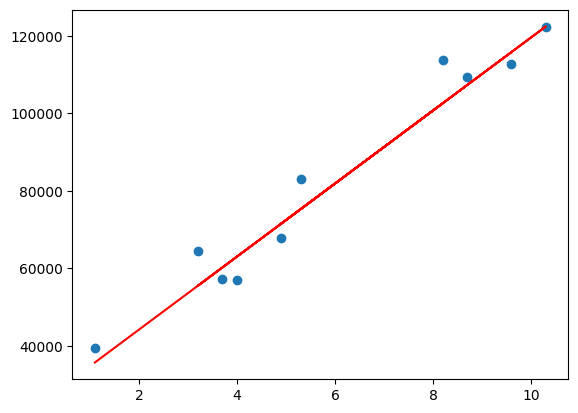

In [28]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color="red")

In [29]:
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error

In [30]:
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

4956.5232614449005
35301898.887134895


In [31]:
print(r2_score(Y_test,Y_pred))

0.9553063138044949
